# 课时6 机器学习原理-线性回归

In [1]:
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.0.0


## 1. 线性回归的简单例子
单变量的线性回归(比如$x$代表学历，$f(x)$代表收入)，则有：
$$f(x) = a · x + b$$
我们使用$f(x)$这个函数来映射输入特征和输出值。
### 1.1 读取数据集以及相关分析

In [4]:
import pandas as pd
data = pd.read_csv('Income1.csv')
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


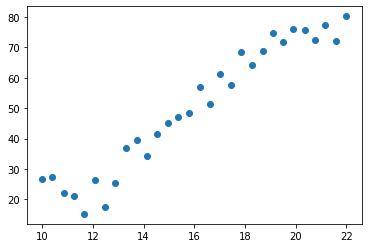

In [6]:
# 绘制数据图像
import matplotlib.pyplot as plt
plt.scatter(data.Education, data.Income)
plt.show()

## 2. 使用tf.keras搭建线性回归模型

In [7]:
# 定义线性回归的x和y变量
x = data.Education
y = data.Income

In [15]:
# 建立顺序模型(一个输入，一个输出)——Sequential
model = tf.keras.Sequential()
# tf.keras.layers.Dense其实对应的是搭建神经网络模型中的一层
# 也就是 Z = W·x + b，这里Dense中没有定义activation function，因此是线性的 
# units代表的是输出单元的大小，input_shape代表的是输入单元的形状大小
model.add(tf.keras.layers.Dense(input_shape=(1,), units=1))
# 显示模型的情况
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 模型编译
model.compile(optimizer='adam', loss='mse')
# 模型训练, epochs=5000代表训练5000次
history = model.fit(x, y, epochs=10)

Train on 30 samples
Epoch 1/10
30/30 [==============================] - 0s 2ms/sample - loss: 112.4472
Epoch 2/10
30/30 [==============================] - 0s 100us/sample - loss: 112.4309
Epoch 3/10
30/30 [==============================] - 0s 133us/sample - loss: 112.4150
Epoch 4/10
30/30 [==============================] - 0s 100us/sample - loss: 112.3996
Epoch 5/10
30/30 [==============================] - 0s 100us/sample - loss: 112.3848
Epoch 6/10
30/30 [==============================] - 0s 100us/sample - loss: 112.3704
Epoch 7/10
30/30 [==============================] - 0s 65us/sample - loss: 112.3566
Epoch 8/10
30/30 [==============================] - 0s 99us/sample - loss: 112.3432
Epoch 9/10
30/30 [==============================] - 0s 98us/sample - loss: 112.3304
Epoch 10/10
30/30 [==============================] - 0s 100us/sample - loss: 112.3182


In [20]:
# 使用模型进行预测
model.predict(x)
# model.predict(pd.Series([20]))

array([[33.214264],
       [34.462593],
       [35.83576 ],
       [37.084087],
       [38.332417],
       [39.705578],
       [40.953907],
       [42.202236],
       [43.450565],
       [44.82373 ],
       [46.07206 ],
       [47.32039 ],
       [48.693546],
       [49.94188 ],
       [51.19021 ],
       [52.56337 ],
       [53.811703],
       [55.060028],
       [56.433193],
       [57.68152 ],
       [58.92985 ],
       [60.303013],
       [61.551346],
       [62.79967 ],
       [64.048   ],
       [65.42116 ],
       [66.669495],
       [67.917816],
       [69.29098 ],
       [70.53931 ]], dtype=float32)